<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#No-qualifications" data-toc-modified-id="No-qualifications-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>No qualifications</a></span></li><li><span><a href="#Level-1-and-entry-level-qualifications:" data-toc-modified-id="Level-1-and-entry-level-qualifications:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Level 1 and entry level qualifications:</a></span></li><li><span><a href="#Level-2-qualifications" data-toc-modified-id="Level-2-qualifications-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Level 2 qualifications</a></span></li><li><span><a href="#Apprenticeship" data-toc-modified-id="Apprenticeship-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Apprenticeship</a></span></li><li><span><a href="#Level-3" data-toc-modified-id="Level-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Level 3</a></span></li><li><span><a href="#Level-4" data-toc-modified-id="Level-4-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level 4</a></span></li><li><span><a href="#Other" data-toc-modified-id="Other-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other</a></span></li><li><span><a href="#Read-in-region-dataset" data-toc-modified-id="Read-in-region-dataset-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Read-in region dataset</a></span></li><li><span><a href="#Read-in-urban-vs-rural-dataset" data-toc-modified-id="Read-in-urban-vs-rural-dataset-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Read-in urban vs rural dataset</a></span></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Outputs</a></span></li></ul></div>

In [1]:
import pandas as pd

In [2]:
he_gi = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/highedu_gi.csv')

In [3]:
he_gi.head()

,Lower tier local authorities Code,Lower tier local authorities,Gender identity (7 categories) Code,Gender identity (7 categories),Highest level of qualification (8 categories) Code,Highest level of qualification (8 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,0
1,E06000001,Hartlepool,-8,Does not apply,0,No qualifications,0
2,E06000001,Hartlepool,-8,Does not apply,1,Level 1 and entry level qualifications: 1 to 4...,0
3,E06000001,Hartlepool,-8,Does not apply,2,Level 2 qualifications: 5 or more GCSEs (A* to...,0
4,E06000001,Hartlepool,-8,Does not apply,3,Apprenticeship,0


In [4]:
he_gi.rename(columns={'Lower tier local authorities Code':'LA_code', 'Lower tier local authorities':'LA_name', 'Gender identity (7 categories) Code': 'GI_code', 'Gender identity (7 categories)': 'GI_categories', 'Highest level of qualification (8 categories) Code': 'HLE_code', 'Highest level of qualification (8 categories)': 'HLE_categories'}, inplace=True)

In [5]:
# Subset to get rid of irrelevant GI categories

he = he_gi[(he_gi['GI_code'] != -8) & (he_gi['HLE_code'] != -8)]

In [6]:
he.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation
9,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,0,No qualifications,15799
10,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,1,Level 1 and entry level qualifications: 1 to 4...,6744
11,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,2,Level 2 qualifications: 5 or more GCSEs (A* to...,10465
12,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,3,Apprenticeship,4888
13,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,4,Level 3 qualifications: 2 or more A levels or ...,13230


In [7]:
# Let's calculate our percentages... 

he['Percentages'] = ''

for i in he.LA_name.unique():
    
    b = he[he['LA_name'] == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    he.loc[b.index, 'Percentages'] = round(perc, 2)

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/3950922124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  he['Percentages'] = ''


In [8]:
he['Total_LA_counts'] = ''

for i in he.LA_name.unique():
    
    b = he[he.LA_name == i]
    
    tot = b.Observation.sum()
    
    he.loc[b.index, 'Total_LA_counts'] = tot

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/4054964020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  he['Total_LA_counts'] = ''


# No qualifications

In [9]:
no_qual = he[(he.HLE_categories == 'No qualifications')]
no_qual.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
9,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,0,No qualifications,15799,21.15,74686
17,E06000001,Hartlepool,2,Gender identity different from sex registered ...,0,No qualifications,70,0.09,74686
25,E06000001,Hartlepool,3,Trans woman,0,No qualifications,10,0.01,74686
33,E06000001,Hartlepool,4,Trans man,0,No qualifications,11,0.01,74686
41,E06000001,Hartlepool,5,All other gender identities,0,No qualifications,2,0.0,74686


In [10]:
no_qual['No qualifications_grp'] = ''

for i in no_qual.LA_code.unique():
    
    v = no_qual[no_qual.LA_code == i]
    
    perc = v.Percentages.sum()
    
    no_qual.loc[v.index, 'No qualifications_grp'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/3870002470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_qual['No qualifications_grp'] = ''


In [11]:
no_qual.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts,No qualifications_grp
9,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,0,No qualifications,15799,21.15,74686,23.13
17,E06000001,Hartlepool,2,Gender identity different from sex registered ...,0,No qualifications,70,0.09,74686,23.13
25,E06000001,Hartlepool,3,Trans woman,0,No qualifications,10,0.01,74686,23.13
33,E06000001,Hartlepool,4,Trans man,0,No qualifications,11,0.01,74686,23.13
41,E06000001,Hartlepool,5,All other gender identities,0,No qualifications,2,0.0,74686,23.13


In [12]:
non_ans = no_qual[no_qual.GI_categories == 'Not answered']

In [13]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("No qualifications_grp", "Percentages", source = non_ans, fill_alpha = 0.5, size = 10)

show(p2)

In [14]:
he.HLE_categories.unique()

array(['No qualifications',
       'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills',
       'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma',
       'Apprenticeship',
       'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma',
       'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA 

# Level 1 and entry level qualifications:



In [15]:
level_1 = he[(he.HLE_categories == 'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills')]
level_1.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
10,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,1,Level 1 and entry level qualifications: 1 to 4...,6744,9.03,74686
18,E06000001,Hartlepool,2,Gender identity different from sex registered ...,1,Level 1 and entry level qualifications: 1 to 4...,8,0.01,74686
26,E06000001,Hartlepool,3,Trans woman,1,Level 1 and entry level qualifications: 1 to 4...,4,0.01,74686
34,E06000001,Hartlepool,4,Trans man,1,Level 1 and entry level qualifications: 1 to 4...,3,0.0,74686
42,E06000001,Hartlepool,5,All other gender identities,1,Level 1 and entry level qualifications: 1 to 4...,1,0.0,74686


In [16]:
level_1['Level 1_grp'] = ''

for i in level_1.LA_code.unique():
    
    v = level_1[level_1.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_1.loc[v.index, 'Level 1_grp'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/804071150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_1['Level 1_grp'] = ''


In [17]:
non_ans2 = level_1[level_1.GI_categories == 'Not answered']

In [18]:
non_ans2

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts,Level 1_grp
50,E06000001,Hartlepool,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,316,0.42,74686,9.47
106,E06000002,Middlesbrough,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,723,0.63,113937,9.84
162,E06000003,Redcar and Cleveland,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,464,0.41,112341,9.77
218,E06000004,Stockton-on-Tees,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,732,0.46,158010,9.69
274,E06000005,Darlington,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,325,0.37,88112,9.4
...,...,...,...,...,...,...,...,...,...,...
18306,W06000020,Torfaen,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,429,0.57,75112,10.25
18362,W06000021,Monmouthshire,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,308,0.39,78236,8.25
18418,W06000022,Newport,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,701,0.55,127422,9.21
18474,W06000023,Powys,6,Not answered,1,Level 1 and entry level qualifications: 1 to 4...,596,0.53,112540,8.61


In [19]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("Level 1_grp", "Percentages", source = non_ans2, fill_alpha = 0.5, size = 10)

show(p2)

# Level 2 qualifications

In [20]:
level_2 = he[(he.HLE_categories == 'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma')]
level_2.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
11,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,2,Level 2 qualifications: 5 or more GCSEs (A* to...,10465,14.01,74686
19,E06000001,Hartlepool,2,Gender identity different from sex registered ...,2,Level 2 qualifications: 5 or more GCSEs (A* to...,18,0.02,74686
27,E06000001,Hartlepool,3,Trans woman,2,Level 2 qualifications: 5 or more GCSEs (A* to...,10,0.01,74686
35,E06000001,Hartlepool,4,Trans man,2,Level 2 qualifications: 5 or more GCSEs (A* to...,9,0.01,74686
43,E06000001,Hartlepool,5,All other gender identities,2,Level 2 qualifications: 5 or more GCSEs (A* to...,7,0.01,74686


In [21]:
level_2['Level 2_grp'] = ''

for i in level_2.LA_code.unique():
    
    v = level_2[level_2.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_2.loc[v.index, 'Level 2_grp'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/3317867294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_2['Level 2_grp'] = ''


In [22]:
non_ans3 = level_2[level_2.GI_categories == 'Not answered']

In [23]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("Level 2_grp", "Percentages", source = non_ans3, fill_alpha = 0.5, size = 10)

show(p2)

# Apprenticeship

In [24]:
appr = he[(he.HLE_categories == 'Apprenticeship')]
appr.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
12,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,3,Apprenticeship,4888,6.54,74686
20,E06000001,Hartlepool,2,Gender identity different from sex registered ...,3,Apprenticeship,10,0.01,74686
28,E06000001,Hartlepool,3,Trans woman,3,Apprenticeship,3,0.0,74686
36,E06000001,Hartlepool,4,Trans man,3,Apprenticeship,3,0.0,74686
44,E06000001,Hartlepool,5,All other gender identities,3,Apprenticeship,1,0.0,74686


In [25]:
appr['Apprenticeships_grp'] = ''

for i in appr.LA_code.unique():
    
    v = appr[appr.LA_code == i]
    
    perc = v.Percentages.sum()
    
    appr.loc[v.index, 'Apprenticeships_grp'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/1298186085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appr['Apprenticeships_grp'] = ''


In [26]:
non_ans4 = appr[appr.GI_categories == 'Not answered']

In [27]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("Apprenticeships_grp", "Percentages", source = non_ans4, fill_alpha = 0.5, size = 10)

show(p2)

# Level 3

In [28]:
level_3 = he[(he.HLE_categories == 'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma')]
level_3.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
13,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,4,Level 3 qualifications: 2 or more A levels or ...,13230,17.71,74686
21,E06000001,Hartlepool,2,Gender identity different from sex registered ...,4,Level 3 qualifications: 2 or more A levels or ...,17,0.02,74686
29,E06000001,Hartlepool,3,Trans woman,4,Level 3 qualifications: 2 or more A levels or ...,8,0.01,74686
37,E06000001,Hartlepool,4,Trans man,4,Level 3 qualifications: 2 or more A levels or ...,6,0.01,74686
45,E06000001,Hartlepool,5,All other gender identities,4,Level 3 qualifications: 2 or more A levels or ...,18,0.02,74686


In [29]:
level_3['Level 3_grp'] = ''

for i in level_3.LA_code.unique():
    
    v = level_3[level_3.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_3.loc[v.index, 'Level 3_grp'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/1357846577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_3['Level 3_grp'] = ''


In [30]:
non_ans5 = level_3[level_3.GI_categories == 'Not answered']

In [31]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("Level 3_grp", "Percentages", source = non_ans5, fill_alpha = 0.5, size = 10)

show(p2)

# Level 4

In [32]:
level_4 = he[(he.HLE_categories == 'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA Higher Diploma, BTEC Higher level, professional qualifications (for example, teaching, nursing, accountancy)')]
level_4.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
14,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,5,"Level 4 qualifications or above: degree (BA, B...",17757,23.78,74686
22,E06000001,Hartlepool,2,Gender identity different from sex registered ...,5,"Level 4 qualifications or above: degree (BA, B...",36,0.05,74686
30,E06000001,Hartlepool,3,Trans woman,5,"Level 4 qualifications or above: degree (BA, B...",13,0.02,74686
38,E06000001,Hartlepool,4,Trans man,5,"Level 4 qualifications or above: degree (BA, B...",17,0.02,74686
46,E06000001,Hartlepool,5,All other gender identities,5,"Level 4 qualifications or above: degree (BA, B...",25,0.03,74686


In [33]:
level_4['Level 4_grp'] = ''

for i in level_4.LA_code.unique():
    
    v = level_4[level_4.LA_code == i]
    
    perc = v.Percentages.sum()
    
    level_4.loc[v.index, 'Level 4_grp'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/294870316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_4['Level 4_grp'] = ''


In [34]:
non_ans6 = level_4[level_4.GI_categories == 'Not answered']

In [35]:
non_ans6

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts,Level 4_grp
54,E06000001,Hartlepool,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",678,0.91,74686,24.81
110,E06000002,Middlesbrough,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1419,1.25,113937,26.44
166,E06000003,Redcar and Cleveland,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1101,0.98,112341,24.93
222,E06000004,Stockton-on-Tees,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1663,1.05,158010,29.52
278,E06000005,Darlington,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",945,1.07,88112,28.95
...,...,...,...,...,...,...,...,...,...,...
18310,W06000020,Torfaen,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",862,1.15,75112,26.79
18366,W06000021,Monmouthshire,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1342,1.72,78236,39.37
18422,W06000022,Newport,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1854,1.46,127422,31.04
18478,W06000023,Powys,6,Not answered,5,"Level 4 qualifications or above: degree (BA, B...",1943,1.73,112540,31.86


In [36]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("Level 4_grp", "Percentages", source = non_ans6, fill_alpha = 0.5, size = 10)

show(p2)

# Other

In [37]:
other = he[(he.HLE_categories == 'Other: vocational or work-related qualifications, other qualifications achieved in England or Wales, qualifications achieved outside England or Wales (equivalent not stated or unknown)')]
other.head()

,LA_code,LA_name,GI_code,GI_categories,HLE_code,HLE_categories,Observation,Percentages,Total_LA_counts
15,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,6,Other: vocational or work-related qualificatio...,1705,2.28,74686
23,E06000001,Hartlepool,2,Gender identity different from sex registered ...,6,Other: vocational or work-related qualificatio...,9,0.01,74686
31,E06000001,Hartlepool,3,Trans woman,6,Other: vocational or work-related qualificatio...,0,0.0,74686
39,E06000001,Hartlepool,4,Trans man,6,Other: vocational or work-related qualificatio...,2,0.0,74686
47,E06000001,Hartlepool,5,All other gender identities,6,Other: vocational or work-related qualificatio...,0,0.0,74686


In [38]:
other['Other_grp'] = ''

for i in other.LA_code.unique():
    
    v = other[other.LA_code == i]
    
    perc = v.Percentages.sum()
    
    other.loc[v.index, 'Other_grp'] = perc

/var/folders/82/8svymys93qv3p2bzp21s9rsc0000gn/T/ipykernel_12993/3908324096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['Other_grp'] = ''


In [39]:
non_ans7 = other[other.GI_categories == 'Not answered']

In [40]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % those with no qualifications in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of those with no qualifications", tooltips = tool)
# output_notebook()

p2.scatter("Other_grp", "Percentages", source = non_ans7, fill_alpha = 0.5, size = 10)

show(p2)

In [41]:
he.HLE_categories.unique()

array(['No qualifications',
       'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills',
       'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma',
       'Apprenticeship',
       'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma',
       'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA 

In [42]:
# List of DataFrames and their corresponding suffixes
dataframes = [(non_ans, '_No qualifications'), (non_ans2, '_Level 1'), (non_ans3, '_Level 2'), (non_ans4, '_Apprenticeships'), (non_ans5, '_Level 3'), (non_ans6, '_Level 4'), (non_ans7, '_Other')]

# Merge the DataFrames one by one
merged_df2 = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df2 = merged_df2.merge(df, on=['LA_code', 'LA_name', 'GI_code', 'GI_categories'], suffixes=('', suffix))
#     merged_df2 = merged_df2.rename(columns={'Total_counts': f'Total_counts{suffix}', 'Total': f'Total{suffix}'})

In [43]:
# List of DataFrames and their corresponding suffixes
dataframes = [(non_ans.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_No qualifications'), 
              (non_ans2.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_Level 1'), 
              (non_ans3.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_Level 2'), 
              (non_ans4.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_Apprenticeships'), 
              (non_ans5.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_Level 3'), 
              (non_ans6.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_Level 4'), 
              (non_ans7.drop(columns=['Total_LA_counts', 'HLE_categories', 'HLE_code', 'Observation']), '_Other')]

# Merge the DataFrames one by one
merged_df2 = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df2 = merged_df2.merge(df, on=['LA_code', 'LA_name', 'GI_code', 'GI_categories'], suffixes=('', suffix))



In [44]:
merged_df2.rename(columns={'Percentages': 'Percentages_No qualifications'}, inplace=True)


In [45]:
merged_df2

,LA_code,LA_name,GI_code,GI_categories,Percentages_No qualifications,No qualifications_grp,Percentages_Level 1,Level 1_grp,Percentages_Level 2,Level 2_grp,Percentages_Apprenticeships,Apprenticeships_grp,Percentages_Level 3,Level 3_grp,Percentages_Level 4,Level 4_grp,Percentages_Other,Other_grp
0,E06000001,Hartlepool,6,Not answered,1.87,23.13,0.42,9.47,0.61,14.67,0.4,6.95,0.67,18.44,0.91,24.81,0.18,2.47
1,E06000002,Middlesbrough,6,Not answered,2.1,23.94,0.63,9.84,0.64,13.39,0.4,6.17,0.87,17.53,1.25,26.44,0.24,2.64
2,E06000003,Redcar and Cleveland,6,Not answered,1.66,22.02,0.41,9.77,0.58,13.94,0.43,7.73,0.68,18.95,0.98,24.93,0.17,2.63
3,E06000004,Stockton-on-Tees,6,Not answered,1.43,18.63,0.46,9.69,0.61,14.57,0.31,6.68,0.63,18.36,1.05,29.52,0.19,2.54
4,E06000005,Darlington,6,Not answered,1.39,19.26,0.37,9.4,0.54,14.45,0.35,7.07,0.61,18.31,1.07,28.95,0.15,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,6,Not answered,2.19,22.14,0.57,10.25,0.73,15.24,0.41,5.74,0.72,16.96,1.15,26.79,0.19,2.86
327,W06000021,Monmouthshire,6,Not answered,1.59,15.74,0.39,8.25,0.75,13.55,0.31,5.05,0.65,15.56,1.72,39.37,0.21,2.46
328,W06000022,Newport,6,Not answered,1.94,21.74,0.55,9.21,0.67,14.27,0.35,5.11,0.76,15.68,1.46,31.04,0.23,2.97
329,W06000023,Powys,6,Not answered,2.17,18.93,0.53,8.61,0.94,14.88,0.46,6.1,0.92,16.99,1.73,31.86,0.23,2.6


In [46]:
# List of religions
hle = ["No qualifications", "Level 1", "Level 2", "Apprenticeships", "Level 3", "Level 4", "Other"]

In [47]:
merged_df2

,LA_code,LA_name,GI_code,GI_categories,Percentages_No qualifications,No qualifications_grp,Percentages_Level 1,Level 1_grp,Percentages_Level 2,Level 2_grp,Percentages_Apprenticeships,Apprenticeships_grp,Percentages_Level 3,Level 3_grp,Percentages_Level 4,Level 4_grp,Percentages_Other,Other_grp
0,E06000001,Hartlepool,6,Not answered,1.87,23.13,0.42,9.47,0.61,14.67,0.4,6.95,0.67,18.44,0.91,24.81,0.18,2.47
1,E06000002,Middlesbrough,6,Not answered,2.1,23.94,0.63,9.84,0.64,13.39,0.4,6.17,0.87,17.53,1.25,26.44,0.24,2.64
2,E06000003,Redcar and Cleveland,6,Not answered,1.66,22.02,0.41,9.77,0.58,13.94,0.43,7.73,0.68,18.95,0.98,24.93,0.17,2.63
3,E06000004,Stockton-on-Tees,6,Not answered,1.43,18.63,0.46,9.69,0.61,14.57,0.31,6.68,0.63,18.36,1.05,29.52,0.19,2.54
4,E06000005,Darlington,6,Not answered,1.39,19.26,0.37,9.4,0.54,14.45,0.35,7.07,0.61,18.31,1.07,28.95,0.15,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,6,Not answered,2.19,22.14,0.57,10.25,0.73,15.24,0.41,5.74,0.72,16.96,1.15,26.79,0.19,2.86
327,W06000021,Monmouthshire,6,Not answered,1.59,15.74,0.39,8.25,0.75,13.55,0.31,5.05,0.65,15.56,1.72,39.37,0.21,2.46
328,W06000022,Newport,6,Not answered,1.94,21.74,0.55,9.21,0.67,14.27,0.35,5.11,0.76,15.68,1.46,31.04,0.23,2.97
329,W06000023,Powys,6,Not answered,2.17,18.93,0.53,8.61,0.94,14.88,0.46,6.1,0.92,16.99,1.73,31.86,0.23,2.6


In [48]:
# Preparing the DataFrame for correlation
correlation_values = []

for i in hle:
    non_response = pd.to_numeric(merged_df2[f"{i}_grp"], errors = 'coerce')
    percentage = pd.to_numeric(merged_df2[f"Percentages_{i}"], errors = 'coerce')
    correlation = non_response.corr(percentage)
    correlation_values.append(correlation)

                   Correlation
No qualifications     0.813228
Level 1               0.420675
Level 2               0.034737
Apprenticeships       0.677805
Level 3               0.355823
Level 4               0.832433
Other                 0.798661


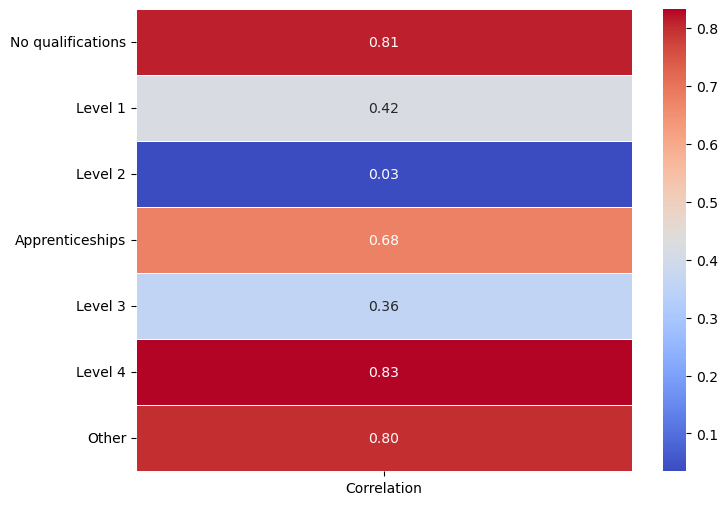

In [49]:
import seaborn as sns
import matplotlib.pylab as plt

# Create a DataFrame for the correlation values
corr_df = pd.DataFrame(correlation_values, index=hle, columns=["Correlation"])

# Display the DataFrame
print(corr_df)

# Display a heatmap of the DataFrame
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

# Read-in region dataset

In [50]:
# Incorporating region - adding it as another column
# Read-in region data

region = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Local_Authority__to_Region.csv')

In [51]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

# Create a new column titled 'region' and set it to empty
merged_df2['region'] = ''


for key, value in key_value_dict.items():
#     Creates a boolean series where key = True
    matching_rows = merged_df2['LA_name'] == key
# Use .loc to access the row in which key = True, i.e. where the 'LA_name' column matches the current key
# We then access the region column and set it's value to match the corresponding value for our key.
    merged_df2.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in


merged_df2.loc[merged_df2['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
merged_df2.loc[merged_df2['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
merged_df2.loc[merged_df2['LA_name'] == 'Bristol', 'region'] = 'South West'

# The rest of the LA_names that weren't filled in all belong to the Wales region
# So we subset the dataframe so we only have those rows where the region column is empty
b = merged_df2[merged_df2.region == '']

# Then we create a list from those unique values
la_names = b.LA_name.unique().tolist()

# We iterate through each value in the list
for i in la_names:
#     Again, we use the same method...
# Creates a boolean series where the rows in LA_name are set to True if they match i
    matching_rows = merged_df2['LA_name'] == i
#     Use .loc to access the rows where LA_name matches i
# We then access the region column and set it's value to 'Wales'
    merged_df2.loc[matching_rows, 'region'] = 'Wales'

# Read-in urban vs rural dataset

In [52]:
rural = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Rural_Urban_2011.xlsx')
rural.head()

,LAD11CD,LAD18CD,LAD18NM,Total Rural population 2011,Urban City and Town population 2011,Urban Minor Conurbation population 2011,Urban Major Conurbation population 2011,Total Urban population 2011,Total population 2011,Hub towns (rural related) population included in Urban population 2011,Rural including hub towns (rural & rural related) population 2011,Rural including hub towns (rural & rural related) population as % of Total population 2011,RUC11CD,RUC11,Broad RUC11
0,E06000001,E06000001,Hartlepool,3173,88855,0,0,88855,92028,0,3173,3.44,4,Urban with City and Town,Predominantly Urban
1,E06000002,E06000002,Middlesbrough,957,137455,0,0,137455,138412,0,957,0.69,4,Urban with City and Town,Predominantly Urban
2,E06000003,E06000003,Redcar and Cleveland,43880,91297,0,0,91297,135177,0,43880,32.46,3,Urban with Significant Rural (rural including ...,Urban with Significant Rural
3,E06000004,E06000004,Stockton-on-Tees,7536,184074,0,0,184074,191610,0,7536,3.93,4,Urban with City and Town,Predominantly Urban
4,E06000005,E06000005,Darlington,13201,92363,0,0,92363,105564,0,13201,12.50,4,Urban with City and Town,Predominantly Urban


In [53]:
rural = rural[['LAD18NM', 'Broad RUC11']]
rural = rural.rename(columns = {"LAD18NM": "LA_name", "Broad RUC11": "Urb_Rur"})



In [54]:
merged_df2 = merged_df2.merge(rural, on=['LA_name'], how='left')

In [55]:
for i in merged_df2.LA_name.unique():
    b = merged_df2[merged_df2.region == 'Wales']
    
    merged_df2.loc[b.index, 'Urb_Rur'] = 'Welsh/not specified'

In [56]:
merged_df2['Urb_Rur'] = merged_df2['Urb_Rur'].fillna('Not specified')

In [57]:
merged_df2.head()

,LA_code,LA_name,GI_code,GI_categories,Percentages_No qualifications,No qualifications_grp,Percentages_Level 1,Level 1_grp,Percentages_Level 2,Level 2_grp,Percentages_Apprenticeships,Apprenticeships_grp,Percentages_Level 3,Level 3_grp,Percentages_Level 4,Level 4_grp,Percentages_Other,Other_grp,region,Urb_Rur
0,E06000001,Hartlepool,6,Not answered,1.87,23.13,0.42,9.47,0.61,14.67,0.4,6.95,0.67,18.44,0.91,24.81,0.18,2.47,North East,Predominantly Urban
1,E06000002,Middlesbrough,6,Not answered,2.1,23.94,0.63,9.84,0.64,13.39,0.4,6.17,0.87,17.53,1.25,26.44,0.24,2.64,North East,Predominantly Urban
2,E06000003,Redcar and Cleveland,6,Not answered,1.66,22.02,0.41,9.77,0.58,13.94,0.43,7.73,0.68,18.95,0.98,24.93,0.17,2.63,North East,Urban with Significant Rural
3,E06000004,Stockton-on-Tees,6,Not answered,1.43,18.63,0.46,9.69,0.61,14.57,0.31,6.68,0.63,18.36,1.05,29.52,0.19,2.54,North East,Predominantly Urban
4,E06000005,Darlington,6,Not answered,1.39,19.26,0.37,9.4,0.54,14.45,0.35,7.07,0.61,18.31,1.07,28.95,0.15,2.55,North East,Predominantly Urban


# Outputs

In [58]:
merged_df2.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_HLE.csv')